<a href="https://colab.research.google.com/github/iba-xm/datascience/blob/main/PentacamIndices(KCN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [ ]:
df = pd.read_excel('/content/Updated_Diagnostic_Database_English.xlsx')
print(df.head())

     ID  Age Sex Eye QC Grade  AVSC  Sphere  Cylinder   Axis  AVCC  ...  \
0  1001   24   H  OD   NORMAL  0.05   -5.50     -1.50   30.0   1.0  ...   
1  1002   24   H  OI   NORMAL   0.1   -4.75     -2.75  170.0   1.0  ...   
2  1003   20   H  OD   NORMAL  0.15    1.00     -6.00    5.0   0.8  ...   
3  1004   20   H  OI   NORMAL   0.1    1.00     -6.00  170.0   0.9  ...   
4  1005   23   M  OD   NORMAL     1     NaN       NaN    NaN   1.0  ...   

   Corneal Coma 90  Trefoil 0°  Trefoil 30°  Tetrafoil 0°  Tetrafoil 22.5°  \
0           -0.429       0.110        0.038        -0.035            0.122   
1            0.191       0.080       -0.047        -0.029           -0.047   
2            0.113      -0.091       -0.037        -0.292            0.035   
3           -0.006       0.093        0.190        -0.165            0.040   
4           -0.129       0.050        0.158        -0.104           -0.138   

   Spherical Aberration  ART Max   PPI  BAD-D       Date  
0                 0.2

In [ ]:
df.describe()

,ID,Age,Sphere,Cylinder,Axis,AVCC,LOGMAR,Spherical Equivalent,K1,K1 Axis,...,Corneal Coma 90,Trefoil 0°,Trefoil 30°,Tetrafoil 0°,Tetrafoil 22.5°,Spherical Aberration,ART Max,PPI,BAD-D,Date
count,205.000000,205.000000,154.000000,174.000000,174.000000,205.000000,205.000000,162.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205
mean,2042.482927,38.760976,-1.988636,-2.172414,92.500000,0.820244,0.138342,-3.047840,44.189268,85.918537,...,-0.833844,0.028000,0.081517,-0.564127,0.032958,0.004205,300.852683,2.396341,4.327561,2018-10-04 14:59:07.317073152
min,1001.000000,18.000000,-20.000000,-6.000000,5.000000,0.050000,0.000000,-21.000000,39.100000,0.300000,...,-7.265000,-1.432000,-1.764000,-118.000000,-0.960000,-3.408000,29.000000,0.600000,-0.280000,2018-01-22 00:00:00
25%,1052.000000,24.000000,-3.937500,-3.500000,45.000000,0.700000,0.000000,-4.500000,42.000000,21.700000,...,-1.234000,-0.091000,-0.103000,-0.088000,-0.083000,-0.019000,173.000000,0.990000,1.320000,2018-07-03 00:00:00
50%,2021.000000,36.000000,-1.000000,-2.000000,90.000000,1.000000,0.000000,-2.000000,43.200000,86.700000,...,-0.372000,0.024000,0.019000,-0.001000,0.002000,0.155000,295.000000,1.190000,2.480000,2018-11-06 00:00:00
75%,3032.000000,52.000000,0.937500,-1.000000,140.000000,1.000000,0.154900,-0.500000,45.000000,152.800000,...,0.029000,0.161000,0.244000,0.098000,0.072000,0.255000,407.000000,1.770000,5.560000,2018-12-18 00:00:00
max,3083.000000,77.000000,6.000000,3.750000,180.000000,1.000000,1.301000,5.500000,62.000000,179.600000,...,0.721000,0.979000,1.767000,1.031000,9.077000,0.927000,696.000000,185.000000,30.010000,2019-02-11 00:00:00
std,899.889359,16.953987,4.233420,1.841364,53.230305,0.271195,0.255536,4.298322,3.624492,63.736466,...,1.267208,0.315641,0.405474,8.244768,0.653135,0.542986,140.286290,12.842825,4.386390,NaN


In [ ]:
df.isnull()

,ID,Age,Sex,Eye,QC Grade,AVSC,Sphere,Cylinder,Axis,AVCC,...,Corneal Coma 90,Trefoil 0°,Trefoil 30°,Tetrafoil 0°,Tetrafoil 22.5°,Spherical Aberration,ART Max,PPI,BAD-D,Date
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,True,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,False,False,False,False,False,False,True,True,True,False,...,False,False,False,False,False,False,False,False,False,False
201,False,False,False,False,False,False,True,True,True,False,...,False,False,False,False,False,False,False,False,False,False
202,False,False,False,False,False,False,True,True,True,False,...,False,False,False,False,False,False,False,False,False,False
203,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.dtypes

ID                                     int64
Age                                    int64
Sex                                   object
Eye                                   object
QC Grade                              object
AVSC                                  object
Sphere                               float64
Cylinder                             float64
Axis                                 float64
AVCC                                 float64
LOGMAR                               float64
Spherical Equivalent                 float64
K1                                   float64
K1 Axis                              float64
K2                                   float64
K2 Axis                              float64
Km                                   float64
KMAX                                 float64
Q                                    float64
IVA                                  float64
IHD                                  float64
K1 Repeat                            float64
K1 Axis Re

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Handling missing values
# Impute missing values with the most frequent value (mode) for categorical variables
# and the median for numerical variables
for column in df.columns:
    if df[column].dtype == 'object':  # Categorical variable
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:  # Numerical variable
        df[column].fillna(df[column].median(), inplace=True)

# Check if there are any missing values remaining
missing_values_after_imputation = df.isnull().sum()
print("Missing Values After Imputation:\n", missing_values_after_imputation)

# Convert categorical variables (if any) to numerical format
# Example: Convert 'Sex' column to numerical format (e.g., Male=0, Female=1)
df['Sex'] = df['Sex'].map({'H': 'Male', 'M': 'Female'})

# Check the data types of each column
print("Data Types:\n", df.dtypes)


Missing Values:
 ID                             0
Age                            0
Sex                            0
Eye                            0
QC Grade                       0
AVSC                          68
Sphere                        51
Cylinder                      31
Axis                          31
AVCC                           0
LOGMAR                         0
Spherical Equivalent          43
K1                             0
K1 Axis                        0
K2                             0
K2 Axis                        0
Km                             0
KMAX                           0
Q                              0
IVA                            0
IHD                            0
K1 Repeat                      0
K1 Axis Repeat                 0
K2 Repeat                      0
K2 Axis Repeat                 0
Km Repeat                      0
Q Repeat                       0
ECC                            0
ECMin                          0
DP                        

In [ ]:
df.describe()

,ID,Age,Sphere,Cylinder,Axis,AVCC,LOGMAR,Spherical Equivalent,K1,K1 Axis,...,Corneal Coma 90,Trefoil 0°,Trefoil 30°,Tetrafoil 0°,Tetrafoil 22.5°,Spherical Aberration,ART Max,PPI,BAD-D,Date
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205
mean,2042.482927,38.760976,-1.742683,-2.146341,92.121951,0.820244,0.138342,-2.828049,44.189268,85.918537,...,-0.833844,0.028000,0.081517,-0.564127,0.032958,0.004205,300.852683,2.396341,4.327561,2018-10-04 14:59:07.317073152
min,1001.000000,18.000000,-20.000000,-6.000000,5.000000,0.050000,0.000000,-21.000000,39.100000,0.300000,...,-7.265000,-1.432000,-1.764000,-118.000000,-0.960000,-3.408000,29.000000,0.600000,-0.280000,2018-01-22 00:00:00
25%,1052.000000,24.000000,-2.000000,-3.000000,60.000000,0.700000,0.000000,-3.500000,42.000000,21.700000,...,-1.234000,-0.091000,-0.103000,-0.088000,-0.083000,-0.019000,173.000000,0.990000,1.320000,2018-07-03 00:00:00
50%,2021.000000,36.000000,-1.000000,-2.000000,90.000000,1.000000,0.000000,-2.000000,43.200000,86.700000,...,-0.372000,0.024000,0.019000,-0.001000,0.002000,0.155000,295.000000,1.190000,2.480000,2018-11-06 00:00:00
75%,3032.000000,52.000000,0.500000,-1.000000,120.000000,1.000000,0.154900,-1.000000,45.000000,152.800000,...,0.029000,0.161000,0.244000,0.098000,0.072000,0.255000,407.000000,1.770000,5.560000,2018-12-18 00:00:00
max,3083.000000,77.000000,6.000000,3.750000,180.000000,1.000000,1.301000,5.500000,62.000000,179.600000,...,0.721000,0.979000,1.767000,1.031000,9.077000,0.927000,696.000000,185.000000,30.010000,2019-02-11 00:00:00
std,899.889359,16.953987,3.691198,1.696825,49.027501,0.271195,0.255536,3.842408,3.624492,63.736466,...,1.267208,0.315641,0.405474,8.244768,0.653135,0.542986,140.286290,12.842825,4.386390,NaN


In [ ]:
df['BAD-D'].describe()

count    205.000000
mean       4.327561
std        4.386390
min       -0.280000
25%        1.320000
50%        2.480000
75%        5.560000
max       30.010000
Name: BAD-D, dtype: float64

Descriptive Statistics:
                 ID         Age      Sphere    Cylinder        Axis  \
count   205.000000  205.000000  205.000000  205.000000  205.000000   
mean   2042.482927   38.760976   -1.742683   -2.146341   92.121951   
min    1001.000000   18.000000  -20.000000   -6.000000    5.000000   
25%    1052.000000   24.000000   -2.000000   -3.000000   60.000000   
50%    2021.000000   36.000000   -1.000000   -2.000000   90.000000   
75%    3032.000000   52.000000    0.500000   -1.000000  120.000000   
max    3083.000000   77.000000    6.000000    3.750000  180.000000   
std     899.889359   16.953987    3.691198    1.696825   49.027501   

             AVCC      LOGMAR  Spherical Equivalent          K1     K1 Axis  \
count  205.000000  205.000000            205.000000  205.000000  205.000000   
mean     0.820244    0.138342             -2.828049   44.189268   85.918537   
min      0.050000    0.000000            -21.000000   39.100000    0.300000   
25%      0.700000    0.00000

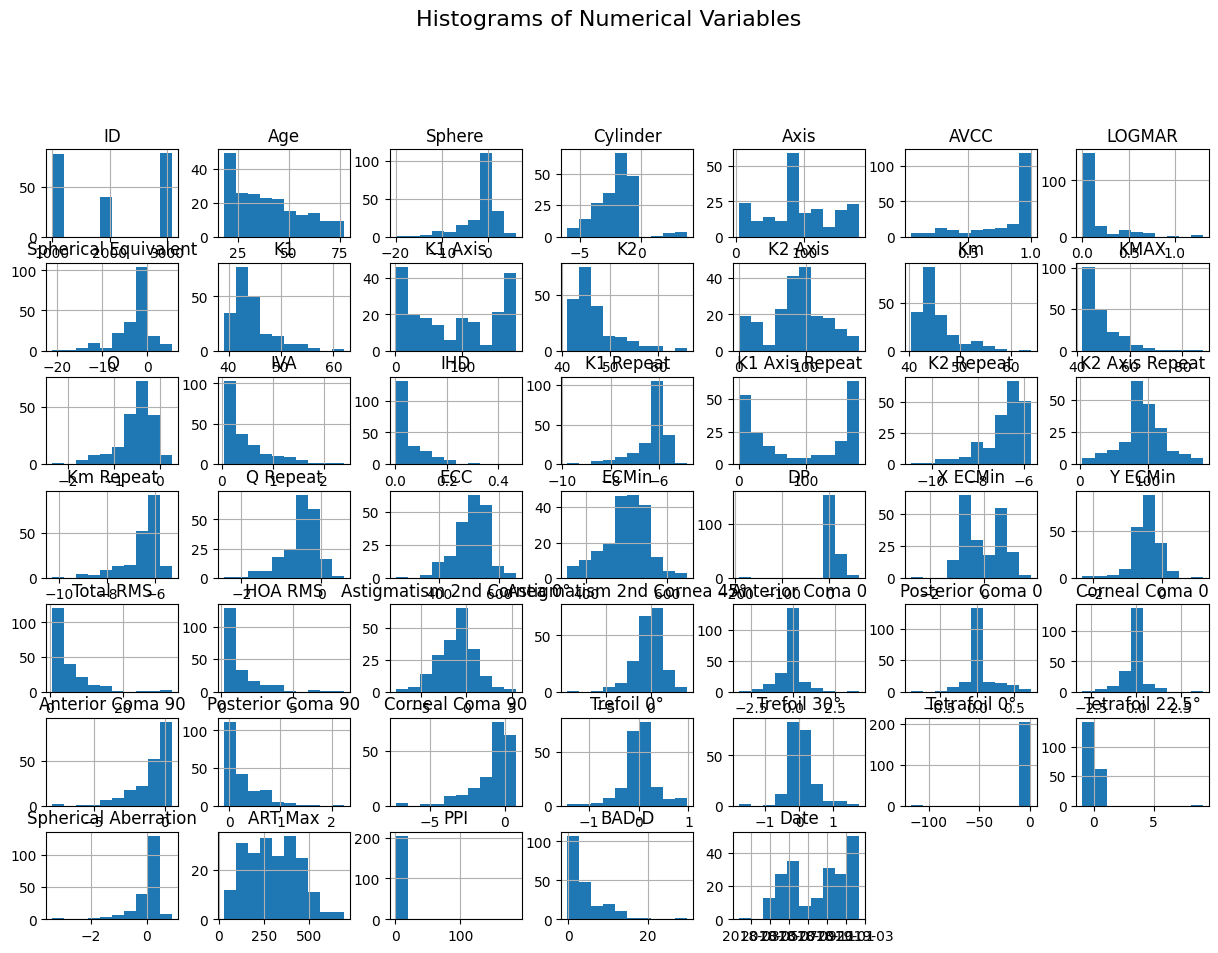

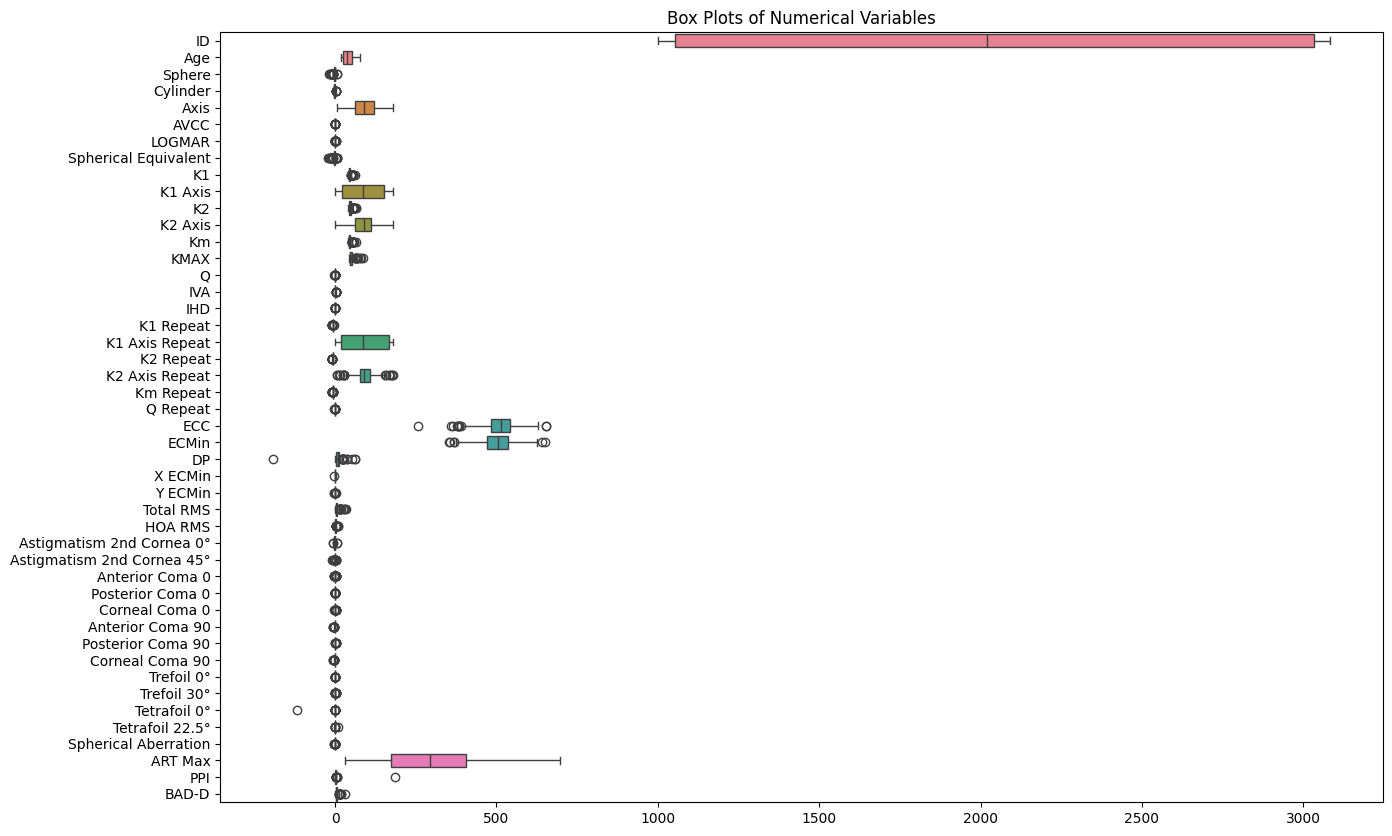

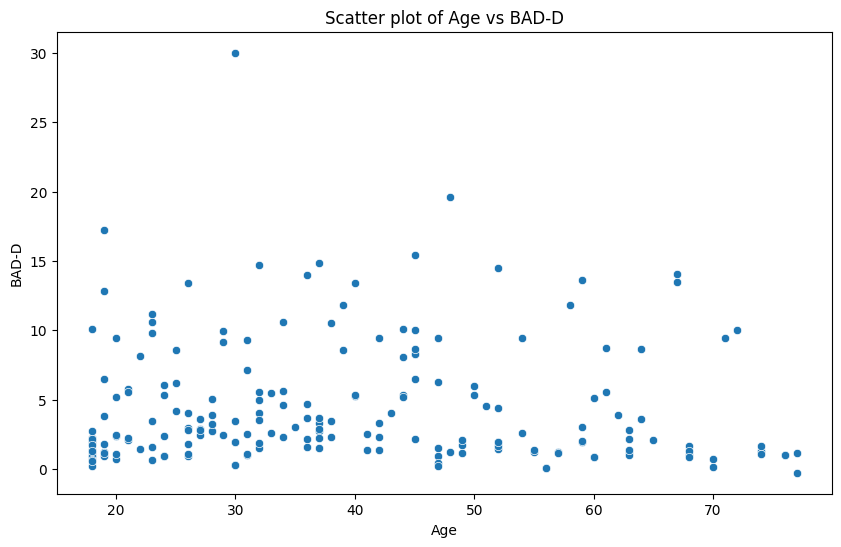

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (assuming it's already loaded and processed)
# If not, you can use the code provided earlier to load the dataset into the 'df' DataFrame

# Descriptive Statistics
print("Descriptive Statistics:\n", df.describe())

# Data Visualization

# Histograms for numerical variables
df.hist(figsize=(15, 10))
plt.suptitle('Histograms of Numerical Variables', y=1.02, fontsize=16)
plt.show()

# Box plots for numerical variables
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, orient='h')
plt.title('Box Plots of Numerical Variables')
plt.show()

# Scatter plot of numerical variables against BAD-D score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='BAD-D', data=df)
plt.title('Scatter plot of Age vs BAD-D')
plt.show()


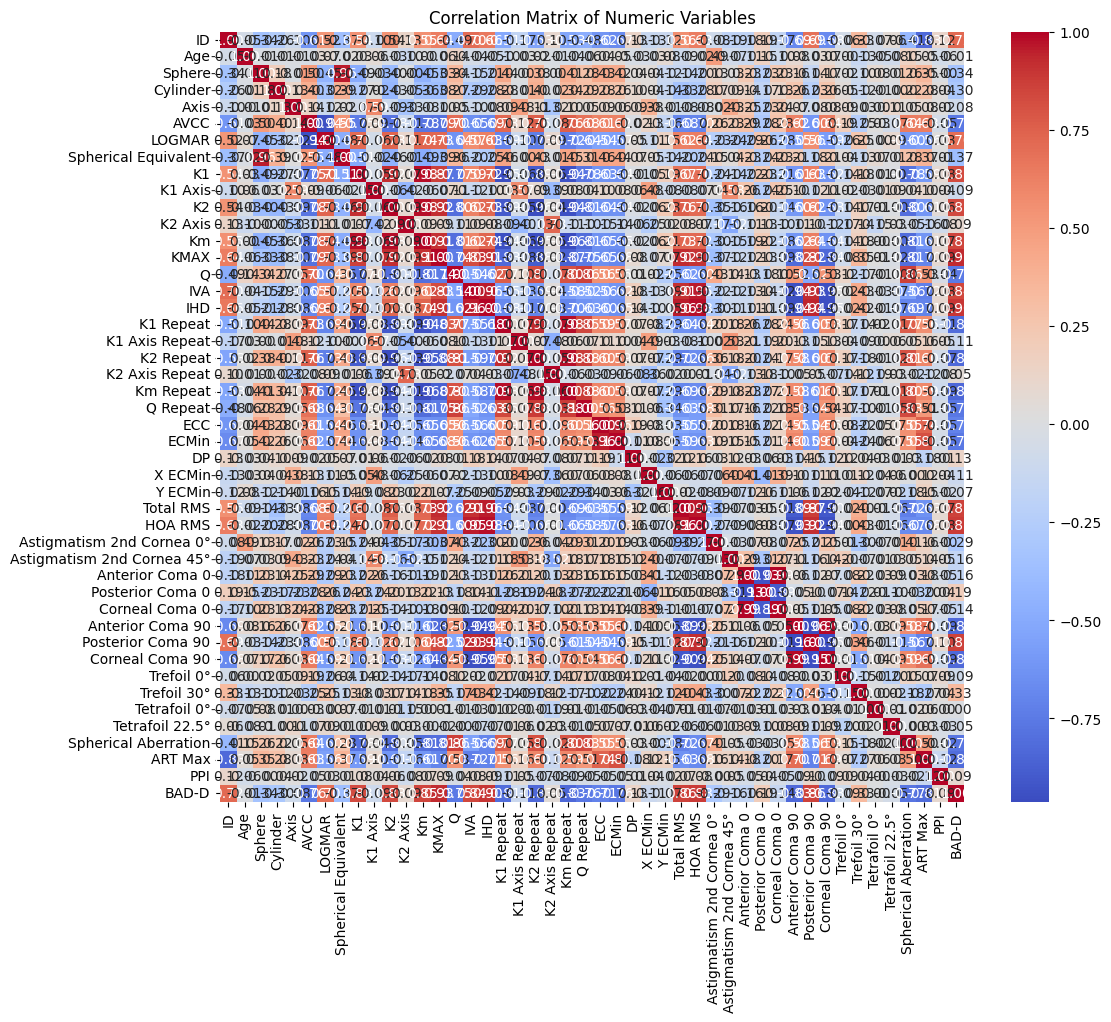

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Plot correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Variables')
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# Select only numeric variables and BAD-D as the target variable
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
X = df[numeric_cols].drop(columns=['BAD-D'])
y = df['BAD-D']

# Feature engineering
# Feature scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Dimensionality reduction (PCA)
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_pca = pca.fit_transform(X_scaled)

# Now, you can choose which engineered features to use for model training
# For example, you can use X_scaled, X_pca, or any combination of engineered features

# Split the data into training and testing sets (use the appropriate engineered features)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)


In [ ]:
normalized_df = pd.DataFrame(data= X_scaled, columns=X.columns)
normalized_df

,ID,Age,Sphere,Cylinder,Axis,AVCC,LOGMAR,Spherical Equivalent,K1,K1 Axis,...,Anterior Coma 90,Posterior Coma 90,Corneal Coma 90,Trefoil 0°,Trefoil 30°,Tetrafoil 0°,Tetrafoil 22.5°,Spherical Aberration,ART Max,PPI
0,0.000000,0.101695,0.557692,0.461538,0.142857,1.000000,0.000000,0.566038,0.152838,0.203012,...,0.894514,0.033660,0.855998,0.639569,0.510337,0.991044,0.107801,0.844521,0.511244,0.002169
1,0.000480,0.101695,0.586538,0.333333,0.942857,1.000000,0.000000,0.566038,0.126638,0.923034,...,0.922237,0.021730,0.933634,0.627126,0.486265,0.991095,0.090963,0.832526,0.527736,0.001952
2,0.000961,0.033898,0.807692,0.000000,0.000000,0.789474,0.074481,0.716981,0.113537,0.008924,...,0.950429,0.034086,0.923867,0.556201,0.489097,0.988885,0.099133,0.766551,0.499250,0.002820
3,0.001441,0.033898,0.807692,0.000000,0.942857,0.894737,0.035204,0.716981,0.104803,0.943670,...,0.941736,0.017469,0.908966,0.632518,0.553384,0.989952,0.099631,0.770473,0.485757,0.002495
4,0.001921,0.084746,0.730769,0.410256,0.485714,1.000000,0.000000,0.716981,0.122271,0.040156,...,0.922119,0.055390,0.893564,0.614683,0.544322,0.990465,0.081897,0.816378,0.587706,0.002603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.998079,0.016949,0.730769,0.410256,0.485714,0.263158,0.362029,0.716981,0.659389,0.847741,...,0.496417,0.371964,0.457551,0.376192,0.594449,0.984592,0.156023,0.000000,0.020990,0.022451
201,0.998559,0.508475,0.730769,0.410256,0.485714,0.000000,1.000000,0.716981,0.746725,0.989961,...,0.217080,0.730294,0.218382,0.000000,1.000000,0.985785,0.082495,0.316263,0.050975,0.019360
202,0.999039,0.694915,0.730769,0.410256,0.485714,0.000000,1.000000,0.716981,0.598253,0.293921,...,0.726771,0.472518,0.449411,0.380340,0.640895,0.988129,0.093853,0.643829,0.109445,0.013720
203,0.999520,0.203390,0.576923,0.410256,0.542857,0.157895,0.537279,0.566038,1.000000,0.068600,...,0.000000,1.000000,0.000000,0.926586,0.819598,1.000000,0.000000,0.015225,0.000000,0.032321


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Choose a regression model (e.g., Linear Regression)
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 0.827714303286711
Root Mean Squared Error (RMSE): 0.9097880540470462
R-squared (R2) Score: 0.9379682484947979
